# IE 7300 - Project

In [2]:
from datetime import date
studentName="shucheng zhang"
studentEmail="zhang.shuche@northeastern.edu"
ProjectAssignment='1'
contributedPercentage=100
print("IE 7300: Statistical learning in engineering")
print("\n"*2)
print(f'Project - {ProjectAssignment}')
print(f'Student name :{studentName}')
print(f'Student Email :{studentEmail}')
print("\n"*2)

print(f'Percentage of Effort Contributed by Student : {contributedPercentage}%')
print(f'Submission Date: {date.today()}')

IE 7300: Statistical learning in engineering



Project - 1
Student name :shucheng zhang
Student Email :zhang.shuche@northeastern.edu



Percentage of Effort Contributed by Student : 100%
Submission Date: 2023-11-27


## Import modules

In [3]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time
import itertools

#Preprocessing methods
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from typing import Dict, Any, List, Tuple
from sklearn.base import clone
import copy
from scipy import stats
from abc import ABC,abstractmethod
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from collections import Counter
from scipy import optimize
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_random_state
from sklearn.preprocessing import LabelEncoder

## Import dataset

In [4]:
# Read the letter recognition csv file
column_names = ["letter", "x-box", "y-box", "width", "high", 
                "onpix", "x-bar", "y-bar", "x2bar", "y2bar", 
                "xybar", "x2ybr", "xy2br", "x-ege", "xegvy",
                "y-ege", "yegvx"]
letter = pd.read_csv("letter-recognition.csv", names = column_names)
letter.head(10)

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [5]:
letter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


### **Perform basic data analysis and preperation to see if the dataset is qualified. Attributes included**
* `letter`: capital letter. As the target variable. (26 values from A to Z)
* `x-box`: horizontal position of box.              (integer)
* `y-box`: vertical position of box.                (integer)
* `width`: width of box.		                    (integer)
* `high`:  height of box.			                (integer)
* `onpix`: total # on pixels. 		                (integer)
* `x-bar`: mean x of on pixels in box.	            (integer)
* `y-bar`: mean y of on pixels in box.	            (integer)
* `x2bar`: mean x variance.			                (integer)
* `y2bar`: mean y variance.			                (integer)
* `xybar`: mean x y correlation.	                (integer)
* `x2ybr`: mean of x * x * y.		                (integer)
* `xy2br`: mean of x * y * y.		                (integer)
* `x-ege`: mean edge count left to right.	        (integer)
* `xegvy`: correlation of x-ege with y.	            (integer)
* `y-ege`: mean edge count bottom to top.	        (integer)
* `yegvx`: correlation of y-ege with x.	            (integer)

## Data preprocessing

In [6]:
# Perform some basic data visualization and preperation.
letter.value_counts()

letter  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx
I       0      0      0      0     0      7      7      4      4      7      6      8      0      8      0      8        26
        1      10     0      7     0      7      7      4      4      7      6      8      0      8      0      8        14
        0      1      0      1     0      7      7      4      4      7      6      8      0      8      0      8        13
X       3      9      4      6     1      7      7      4      4      7      6      8      3      8      4      8        10
I       1      9      0      6     0      7      7      4      4      7      6      8      0      8      0      8        10
                                                                                                                         ..
        6      11     7      8     5      7      8      1      8      7      6      8      0      7      4      8         1
              

In [7]:
# Checking null values.
letter.isnull().sum()

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

No missing value. A high quality dataset ready for analyze

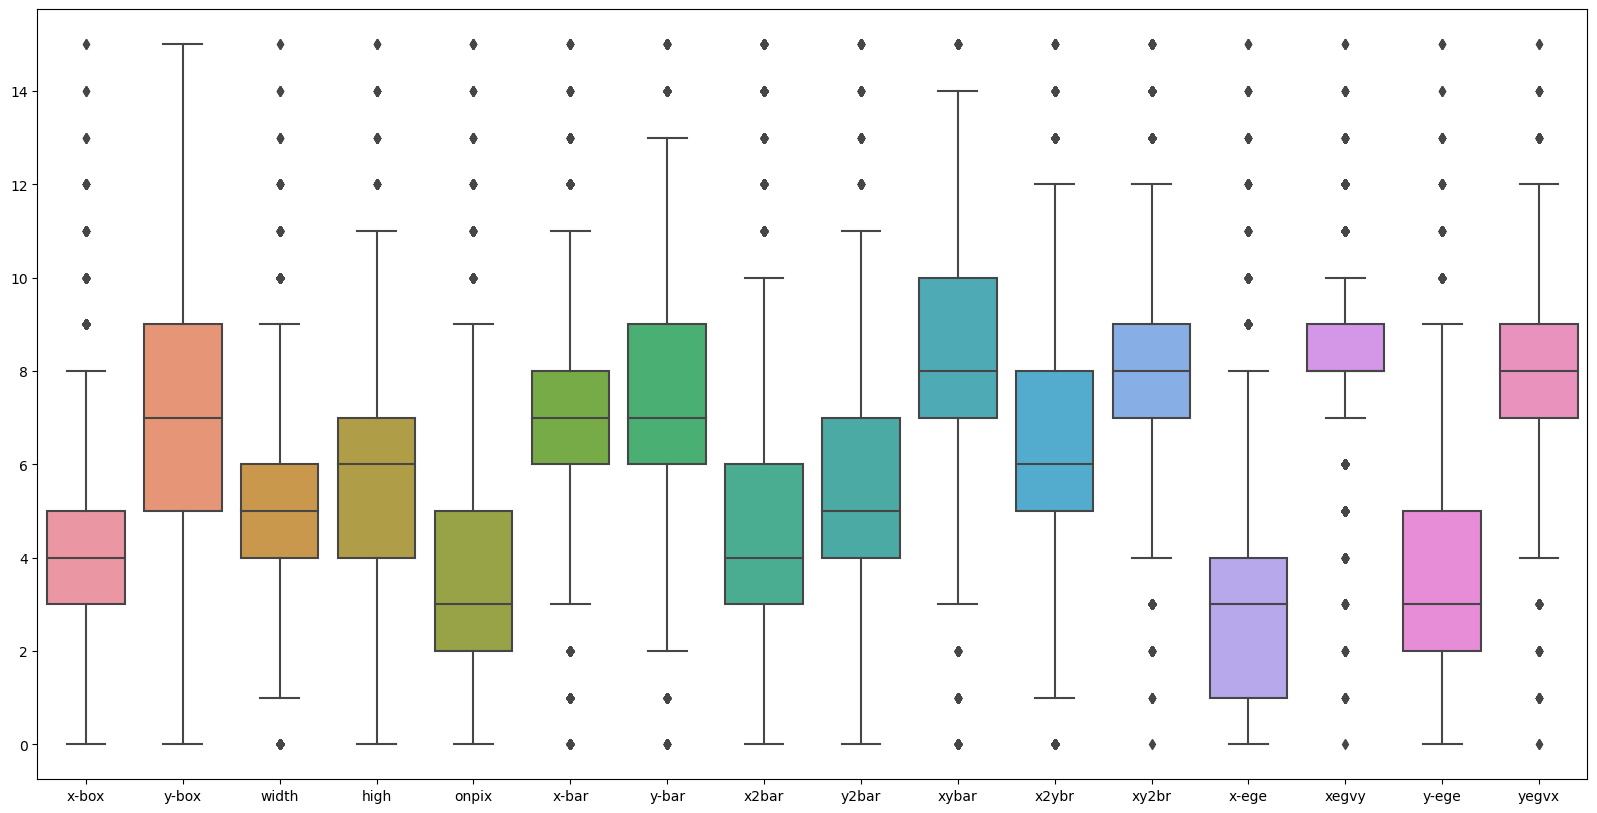

In [8]:
# Perform outliers analysis
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=letter)
plt.show()

## Explanatory Data Analysis

In [9]:
# Show the distribution of data in each column of the Drybean dataset.
letter.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


The overall descriptive statistics are shown
* The mean, standard deviation, min, max, and each percentile data from this descriptive statistic table.
* The data are mostly normally distributed with some outliers. Some of them need to be remained to be analyzed.
* No missing values are found in this dataset. Duplicates are remained for analysis.

<Figure size 1500x1500 with 0 Axes>

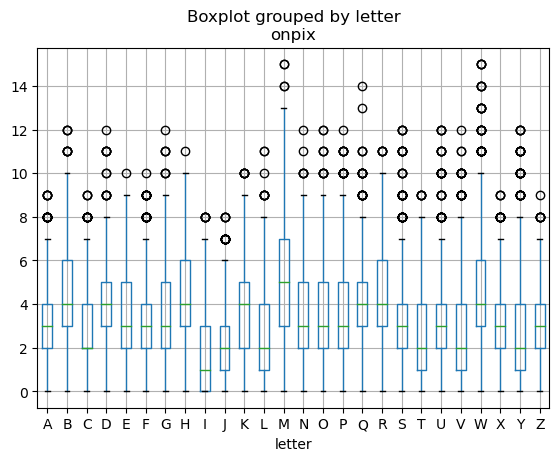

In [10]:
# Show the distribution of Total numbers on pixels for each letter.
plt.figure(figsize = (15,15))
ax = letter.boxplot(column ='onpix', by = 'letter')
plt.show()

This boxplot basically shows the distribution of `onpix` among the A-Z letter.

<Figure size 1500x1500 with 0 Axes>

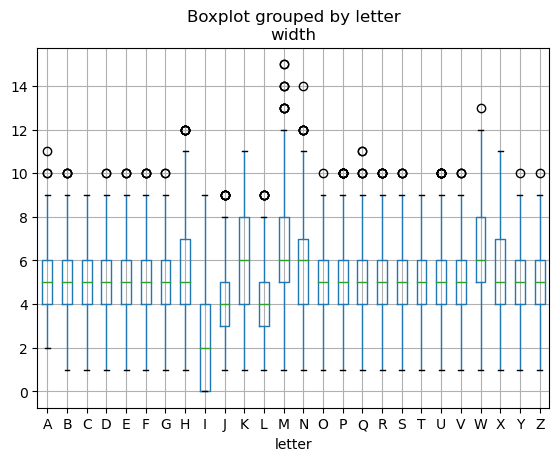

In [11]:
# Show the distribution of the letter width for each letter.
plt.figure(figsize = (15,15))
ax = letter.boxplot(column ='width', by = 'letter')
plt.show()

This boxplot basically shows the distribution of letters' width among each letter from A-Z

<Figure size 1500x1500 with 0 Axes>

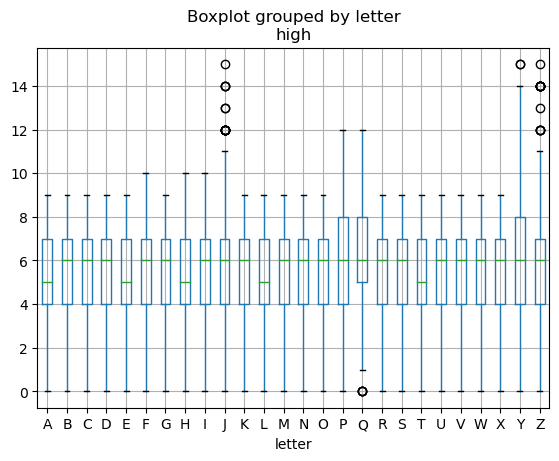

In [12]:
# Show the distribution of the letter height for each letter.
plt.figure(figsize = (15,15))
ax = letter.boxplot(column ='high', by = 'letter')
plt.show()

This boxplot basically shows the distribution of letters' height among each letter from A-Z

In [13]:
# Show some descriptive analysis of mean data of difference class
letter.groupby('letter')['onpix', 'x-bar', 'y-bar', 'x-ege', 'y-ege'].mean().head(10)

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\2019248074.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  letter.groupby('letter')['onpix', 'x-bar', 'y-bar', 'x-ege', 'y-ege'].mean().head(10)


,onpix,x-bar,y-bar,x-ege,y-ege
letter,,,,,
A,2.991128,8.851711,3.631179,2.771863,2.875792
B,4.596606,7.671018,7.062663,3.117493,6.612272
C,2.775815,5.437500,7.627717,1.991848,4.080163
D,4.026087,7.539130,6.806211,3.365217,3.971429
E,3.679688,5.966146,7.352865,2.127604,6.022135
F,3.178065,4.913548,10.454194,1.736774,3.321290
G,3.566624,6.866753,6.586028,2.833118,5.146184
H,4.253406,7.344687,7.320163,3.862398,3.095368
I,1.825166,7.458278,7.035762,0.537748,2.141722


This shows a partial feature analysis of the mean data of `onpix`, `x-bar`, `y-bar`, `x-ege`, `y-ege` of each letters.

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\108298298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = letter.corr()


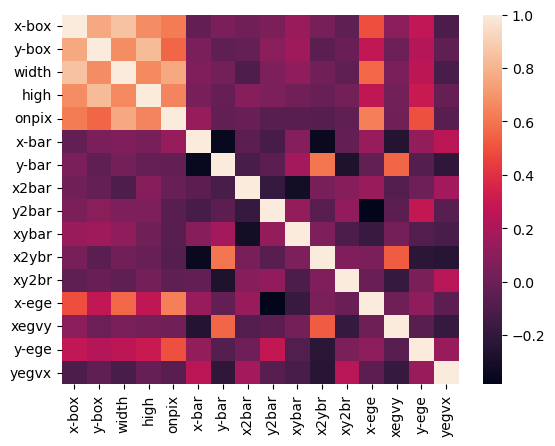

In [14]:
# Show the heatmap and correlation of different data.
corr = letter.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

Based on the correlation heat map, we can find that most features are not correlated with each other

In [15]:
# Show the specific correlation between each data
corr

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
x-box,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
y-box,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
high,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
x-bar,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
y-bar,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335
xybar,0.148056,0.159954,0.115018,0.012458,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.057988,-0.106759,-0.175676,0.029419,-0.087019,-0.114223


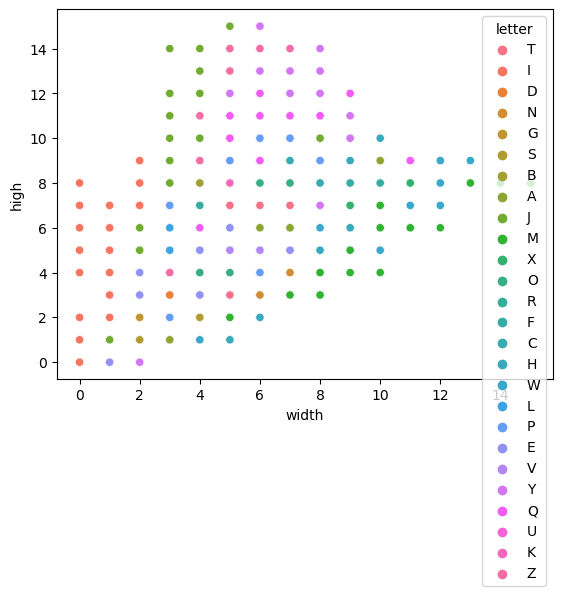

In [16]:
# Generate the relation scatterplots between width and height of letters.
sns.scatterplot(x='width', y='high', data=letter, hue='letter')
plt.show()


The above generated relation scatterplots showing the relationship and distribution between width and height of the different letters. Classified into letter class.

### Univariate Numeric Analysis

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


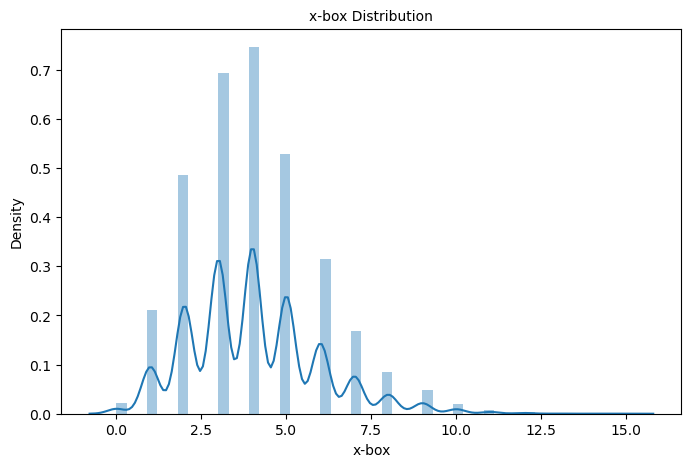

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


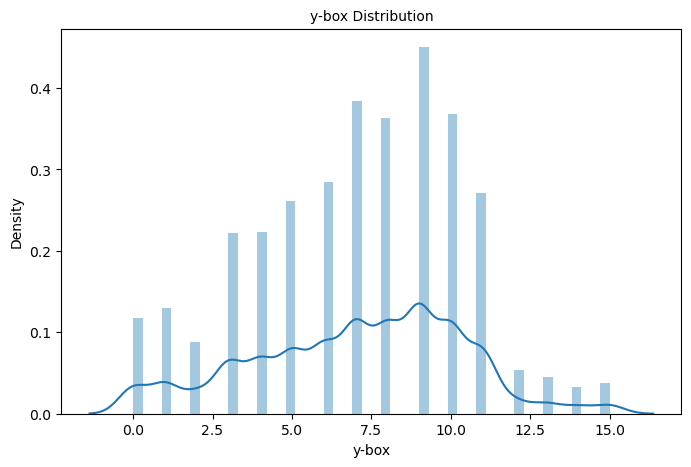

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


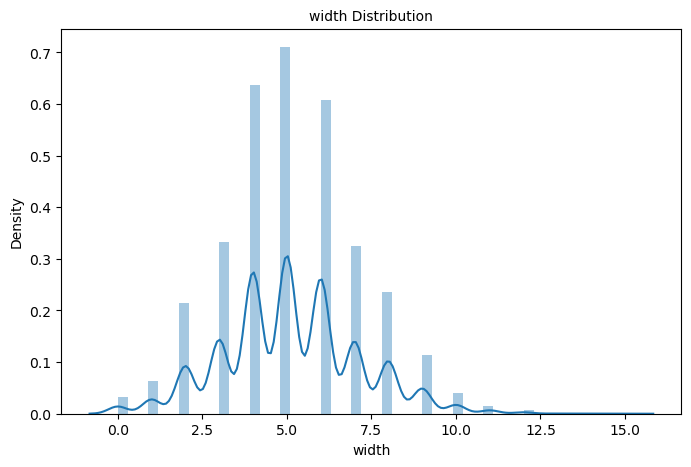

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


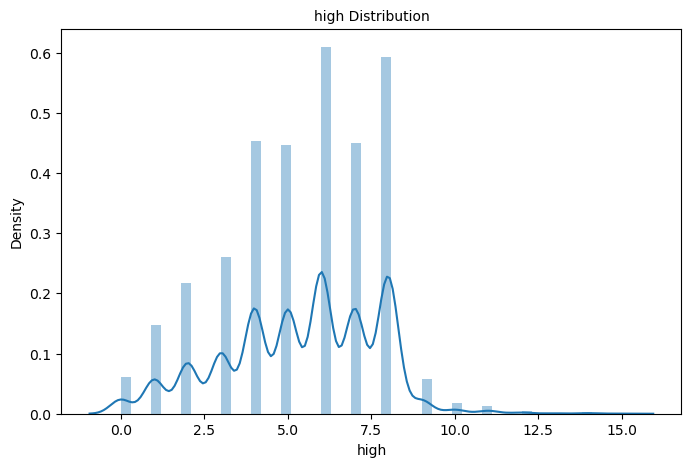

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


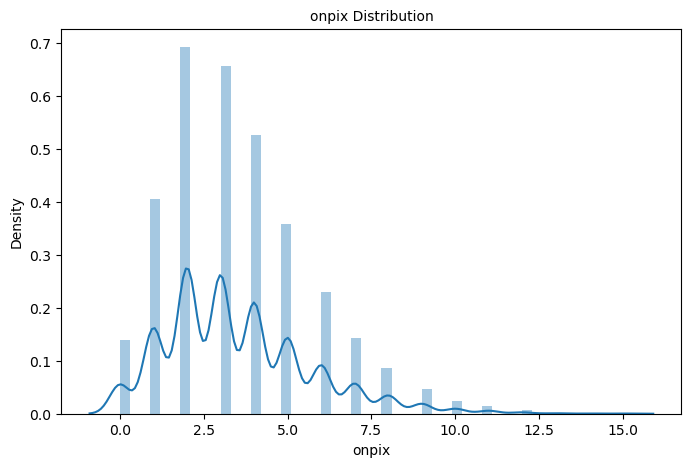

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


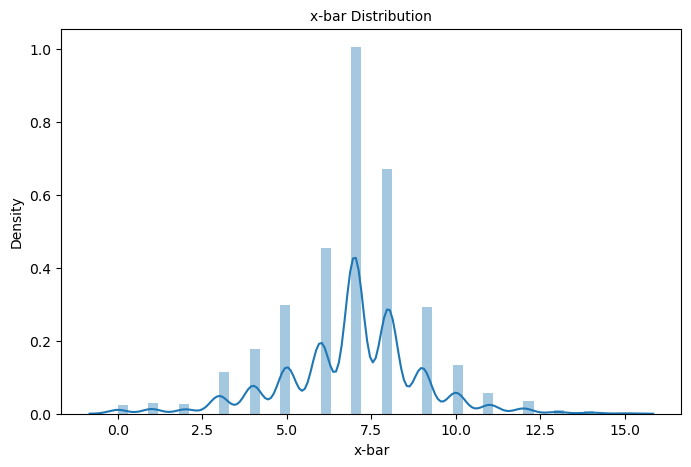

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


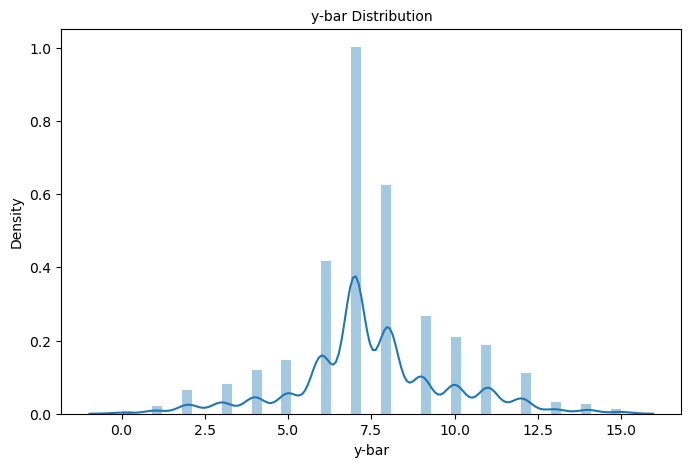

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


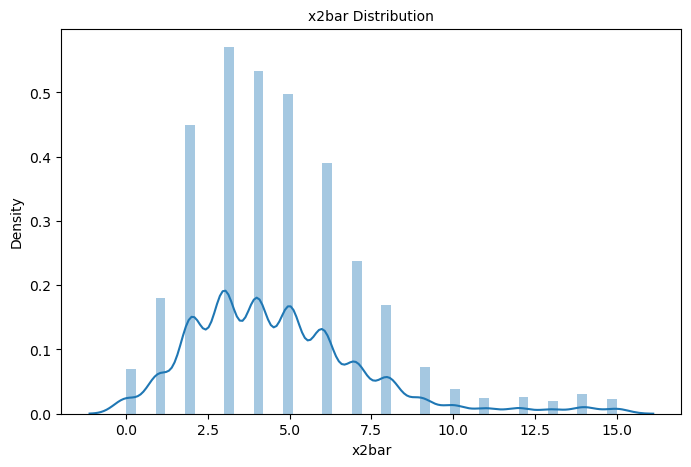

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


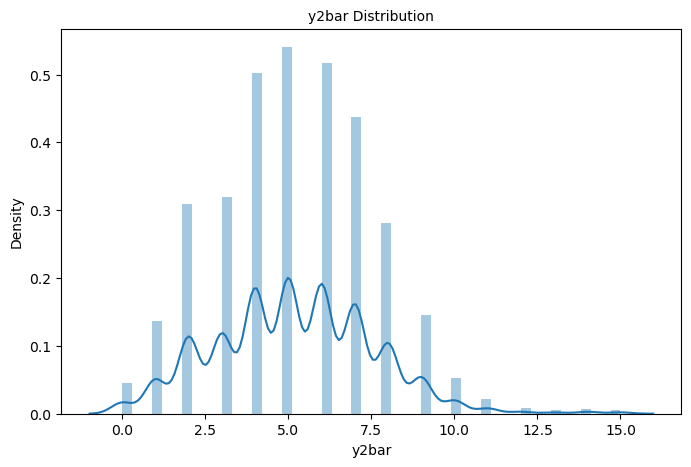

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


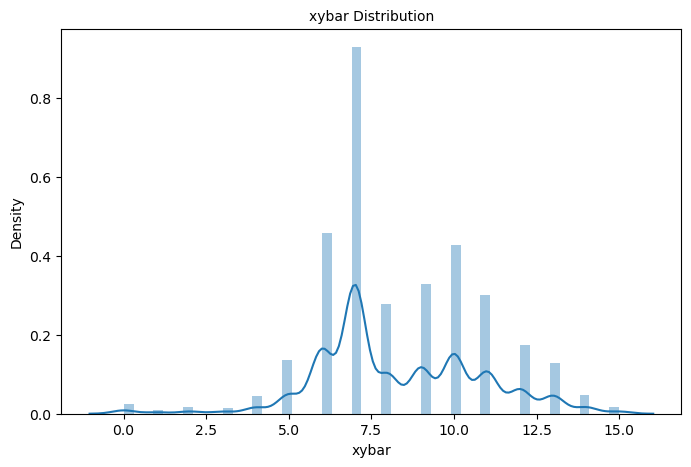

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


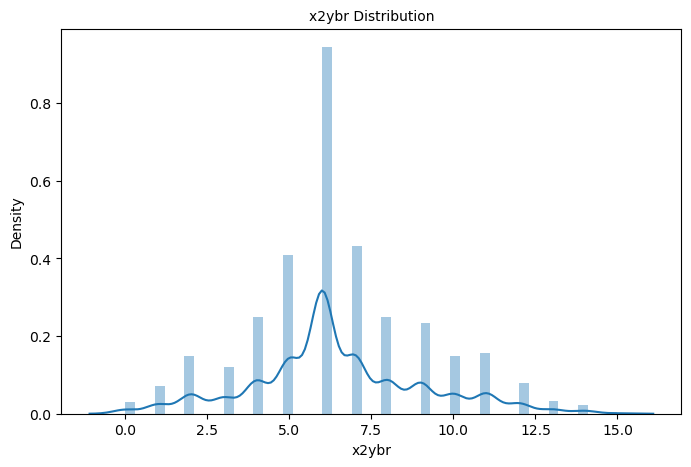

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


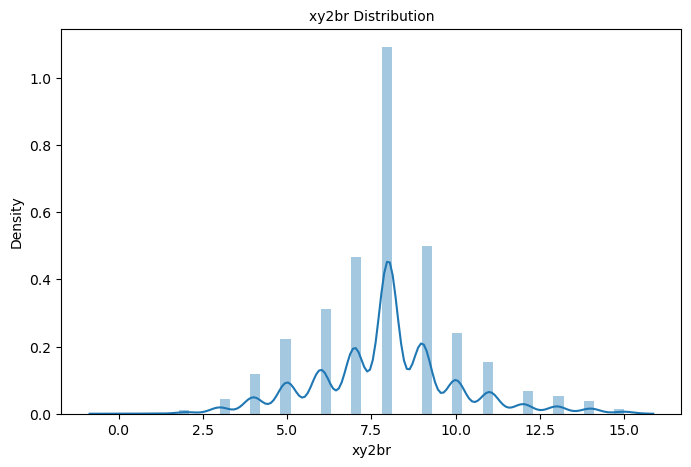

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


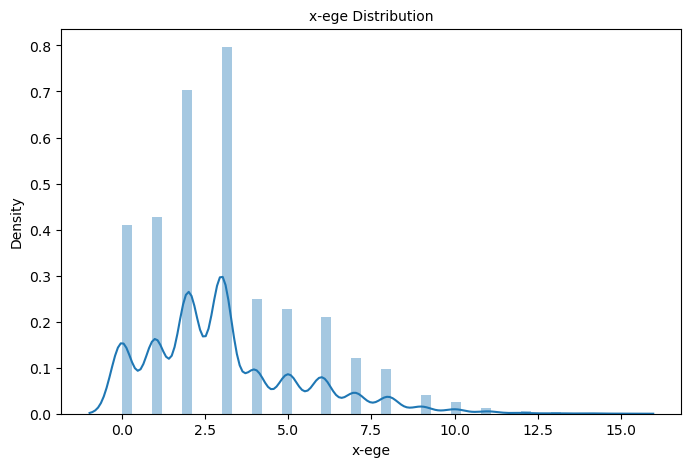

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


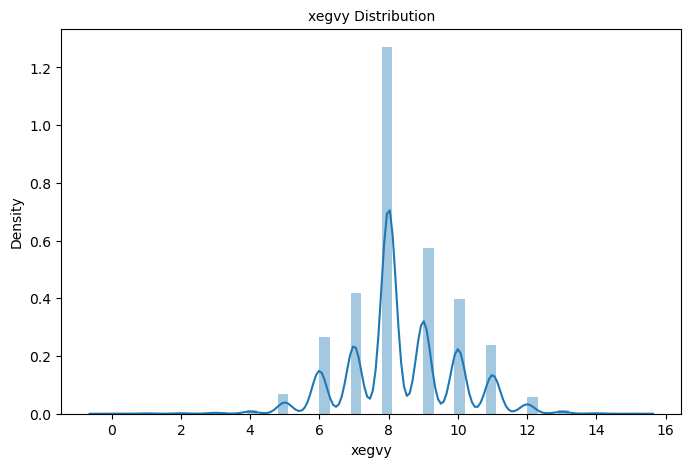

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


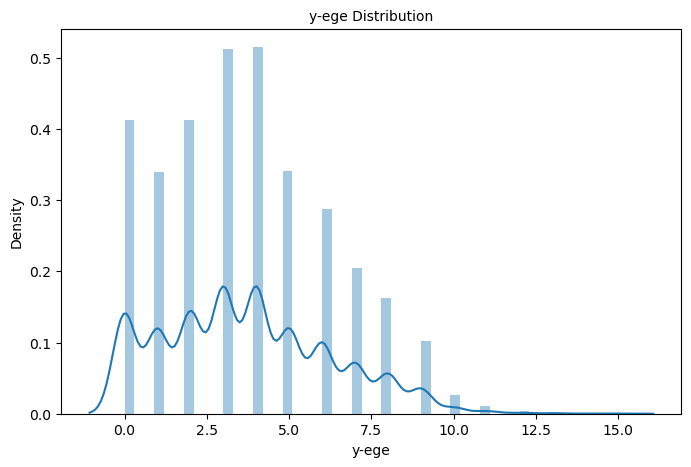

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\3031760800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(letter[feature])


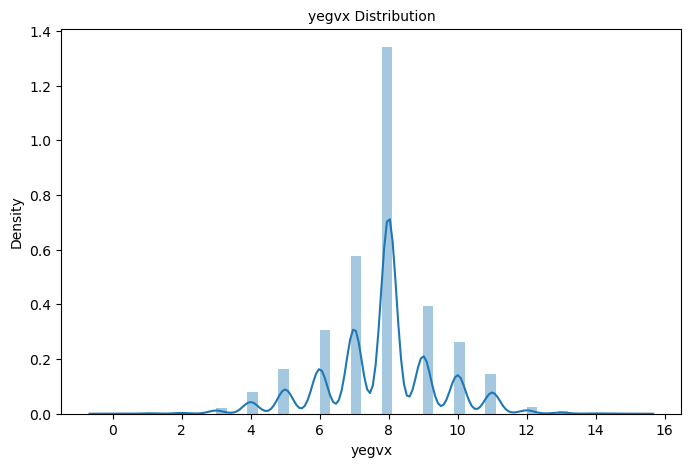

In [17]:
# Numeric features univariate analysis
numeric_features = ["x-box", "y-box", "width", "high", 
                "onpix", "x-bar", "y-bar", "x2bar", "y2bar", 
                "xybar", "x2ybr", "xy2br", "x-ege", "xegvy",
                "y-ege", "yegvx"]
for feature in numeric_features:
    plt.figure(figsize=(8, 5), facecolor='w')
    sns.distplot(letter[feature])
    plt.title('{} Distribution'.format(feature), fontsize=10)
    plt.show()

Based on the plots, We can find that
* `onpix`, `x2bar`, `y2bar`, `x-ege`, `y-ege` are right skewed distributed
* `x-box`, `width`, `x-bar`, `y-bar`, `xybar`, `x2ybar`, `xy2bar`, `xegvy`, `yegvx` are quite normally distributed
* `y-box`, `high` are left skewed distributed

## Data Train Test Split

In [18]:
# Define Features and Lables
X = letter.drop(columns=["letter"]) 
y = letter["letter"]


# Scaling dataset
sc = StandardScaler()
X = sc.fit_transform(X)


# Splitting the dataset again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Implementation

## KNN model

In [19]:
# Implement the KNN class
class KNN(ABC):
    """
    Base class for KNN implementations
    """
    # Initialize parameters
    def __init__(self, K : int = 3, metric : str = 'minkowski', p : int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
            K      -> integer specifying number of neighbours to consider
            metric -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
            p      -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # check distance is a valid entry
        valid_distance = ['minkowski','cosine']
        if metric not in valid_distance:
            msg = "Entered value for metric is not valid. Pick one of {}".format(valid_distance)
            raise ValueError(msg)
        # check minkowski p parameter
        if (metric == 'minkowski') and (p <= 0):
            msg = "Entered value for p is not valid. For metric = 'minkowski', p >= 1"
            raise ValueError(msg)
        # store/initialise input parameters
        self.K       = K
        self.metric  = metric
        self.p       = p
        self.X_train = np.array([])
        self.y_train = np.array([])
        
    # Destructor function initiate
    def __del__(self) -> None:
        """
        Destructor function. 
        """
        del self.K
        del self.metric
        del self.p
        del self.X_train
        del self.y_train
      
    # Minkowski distance function
    def __minkowski(self, x : np.array) -> np.array:
        """
        Private function to compute the minkowski distance between point x and the training data X
        Inputs:
            x -> numpy data point of predictors to consider
        Outputs:
            np.array -> numpy array of the computed distances
        """
        return np.power(np.sum(np.power(np.abs(self.X_train - x),self.p),axis=1),1/self.p)
    
    # Cosine distance function
    def __cosine(self, x : np.array) -> np.array:
        """
        Private function to compute the cosine distance between point x and the training data X
        Inputs:
            x -> numpy data point of predictors to consider
        Outputs:
            np.array -> numpy array of the computed distances
        """
        return (1 - (np.dot(self.X_train,x)/(np.linalg.norm(x)*np.linalg.norm(self.X_train,axis=1))))
    
    # Distance function
    def __distances(self, X : np.array) -> np.array:
        """
        Private function to compute distances to each point x in X[x,:]
        Inputs:
            X -> numpy array of points [x]
        Outputs:
            D -> numpy array containing distances from x to all points in the training set.
        """
        # cover distance calculation
        if self.metric == 'minkowski':
            D = np.apply_along_axis(self.__minkowski,1,X)
        elif self.metric == 'cosine':
            D = np.apply_along_axis(self.__cosine,1,X)
        # return computed distances
        return D
    
    @abstractmethod
    def _generate_predictions(self, idx_neighbours : np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        """
        pass
        
    # Initialize fit function
    def fit(self, X : np.array, y : np.array) -> None:
        """
        Public training function for the class. It is assummed input X has been normalised.
        Inputs:
            X -> numpy array containing the predictor features
            y -> numpy array containing the labels associated with each value in X
        """
        # store training data
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)
        
    # Initialize predict function
    def predict(self, X : np.array) -> np.array:
        """
        Public prediction function for the class. 
        It is assummed input X has been normalised in the same fashion as the input to the training function
        Inputs:
            X -> numpy array containing the predictor features
        Outputs:
           y_pred -> numpy array containing the predicted labels
        """
        # ensure we have already trained the instance
        if (self.X_train.size == 0) or (self.y_train.size == 0):
            raise Exception('Model is not trained. Call fit before calling predict.')
        # compute distances
        D = self.__distances(X)
        # obtain indices for the K nearest neighbours
        idx_neighbours = D.argsort()[:,:self.K]
        # compute predictions
        y_pred = self._generate_predictions(idx_neighbours)
        # return results
        return y_pred
    
    # get parameters function
    def get_params(self, deep : bool = False) -> Dict:
        """
        Public function to return model parameters
        Inputs:
            deep -> boolean input parameter
        Outputs:
            Dict -> dictionary of stored class input parameters
        """
        return {'K':self.K,
                'metric':self.metric,
                'p':self.p}
        
        
# Implement KNN classifier class
class KNNClassifier(KNN):
    """
    Class for KNN classifiction implementation
    """
    
    # Initialize parameters
    def __init__(self, K : int = 3, metric : str = 'minkowski', p : int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
            K       -> integer specifying number of neighbours to consider
            metric  -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
            p       -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # call base class initialiser
        super().__init__(K,metric,p)
        
    # Initialize generate predictions function
    def _generate_predictions(self, idx_neighbours : np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        Inputs:
            idx_neighbours -> indices of nearest neighbours
        Outputs:
            y_pred -> numpy array of prediction results
        """        
        # compute the mode label for each submitted sample
        y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()   
        # return result
        return y_pred
    
    # confusion matrix function
    def confusion_matrix(self, y_true, y_pred):
        classes = np.unique(y_true)
        cm = np.zeros((len(classes), len(classes)), dtype=int)
        for i, true_label in enumerate(classes):
            for j, pred_label in enumerate(classes):
                cm[i, j] = np.sum((y_true == true_label) & (y_pred == pred_label))
        return cm

    # accuracy calculation
    def accuracy(self, y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)

    # precision calculation
    def precision(self, y_true, y_pred):
        cm = self.confusion_matrix(y_true, y_pred)
        precision = np.diag(cm) / np.sum(cm, axis=0)
        return np.nanmean(precision)  # nanmean to handle division by zero

    # recall calculation
    def recall(self, y_true, y_pred):
        cm = self.confusion_matrix(y_true, y_pred)
        recall = np.diag(cm) / np.sum(cm, axis=1)
        return np.nanmean(recall)

    # f1 score calculation
    def f1_score(self, y_true, y_pred):
        prec = self.precision(y_true, y_pred)
        rec = self.recall(y_true, y_pred)
        return 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

    # Initialize classification report function
    def classification_report(self, y_true, y_pred):
        acc = self.accuracy(y_true, y_pred)
        prec = self.precision(y_true, y_pred)
        rec = self.recall(y_true, y_pred)
        f1 = self.f1_score(y_true, y_pred)
        cm = self.confusion_matrix(y_true, y_pred)

        report = f"Classification Report:\n"
        report += f"Accuracy: {acc:.2f}\n"
        report += f"Precision: {prec:.2f}\n"
        report += f"Recall: {rec:.2f}\n"
        report += f"F1 Score: {f1:.2f}\n"
        report += f"Confusion Matrix:\n{cm}\n"

        return report

## Fit and Predict

In [27]:
# Create an instance of KNNClassifier
knn_classifier = KNNClassifier(K=3, metric='minkowski', p=2)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
accuracy = knn_classifier.accuracy(y_test, y_pred)
precision = knn_classifier.precision(y_test, y_pred)
recall = knn_classifier.recall(y_test, y_pred)
f1 = knn_classifier.f1_score(y_test, y_pred)
confusion_matrix = knn_classifier.confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion_matrix)

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
Confusion Matrix:
[[149   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 148   0   0   1   0   0   0   0   0   2   0   0   0   0   0   0   0
    0   0   0   2   0   0   0   0]
 [  0   0 132   0   1   0   2   0   0   0   0   0   0   0   1   0   0   0
    0   0   1   0   0   0   0   0]
 [  0   2   0 151   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0]
 [  0   3   3   0 131   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   1   0   2]
 [  0   0   1   2   0 129   1   0   0   0   0   0   0   0   0   3   0   0
    0   3   0   0   0   1   0   0]
 [  0   0   1   2   2   0 151   2   0   0   0   0   0   0   0   0   0   0
    1   0   0   1   0   0   0   0]
 [  0   7   0   6   1   0   2 116   0   0   3   0   0   2   0   0   0   6
    0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 138   7   0   0  

### Based on the above performance evaluation metrics included confusion matrix, accuracy score, classification report including precision, recall, f1-score, conclusion can be drawn from the K-nearest Neighbors classification model for the letter dataset.

`Confusion Matrix` provides a breakdown of true positive, false positive, true negative, and false negative predictions for each class within correct classification of test dataset. In this case, there might be
26 classes include alphabet from A to Z. Correct classification and misclassification will be shown in the confusion matrix.

</br>

`Classification Report`:

`Precision`:
* 0.94 means that out of all instances predicted, 94% were correctly classified.


`Recall`:
* 0.94, indicating 94% of actual alphabet instances were correctly predicted.


`F1-Score`: The harmonic mean of precision and recall.
* 0.94 of f1 score suggesting a good balance of precision and recall for all the classified alphabet classes.

`Support`: The number of actual occurrences of the class in the test dataset.

</br>

The overall accuracy of 0.94 means the KNN model correctly predicts the class 94% of the time for the test dataset. Which is a great score but sometimes can be threated by overfitting.
Throughout the train and prediction process, conclusion can be drawn that KNN is simple to implement, no extra assumption about data is required and very effective if the dataset has sufficient representative samples.However, it can be computationally intensive, especially with large datasets. The model performance might be heavily depends on the choice of 'K' and the distance metric. So based on the strength of this model, 
* `Reason for Selection:` Good for baseline modeling and when the data might not have clear boundaries.

## Multiclass logistic regression model (With Regularization)

In [28]:
# Implement Multiclass Logistic Regression class
class MultiClassLogisticRegression:
    
    # Initialize function with hyperparameters
    def __init__(self, learning_rate=0.01, epochs=10000, regularization='none', reg_strength=0.1, 
                 l1_ratio=0.001, batch_size=64, threshold=1e-5, decay=1e-5):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.l1_ratio = l1_ratio
        self.threshold = threshold
        self.decay = decay
        
        self.classifiers = []
        self.weights_list = []
        self.costs = []
    
    # Initialize sigmoid function
    def _sigmoid(self, z):
        """Compute the sigmoid function."""
        return 1 / (1 + np.exp(-z))
    
    # Initialize gradient decent function
    def _compute_gradients(self, X, y, y_pred, weights):
        """Compute gradients for weights with regularization."""
        m = len(y)
        loss = np.dot(X.T, (y_pred - y)) / m
        
        # Regularization adjustments, L1 for Lasso regularization, L2 for Ridge, and elastic net
        if self.regularization == "l1":
            loss[1:] += self.reg_strength * np.sign(weights[1:])
            
        elif self.regularization == "l2":
            loss[1:] += self.reg_strength * weights[1:]
            
        elif self.regularization == "elasticnet":
            loss[1:] += (self.l1_ratio * self.reg_strength * np.sign(weights[1:]) +
                       (1 - self.l1_ratio) * self.reg_strength * weights[1:])
        
        return loss
    
    
    # Initialize accuracy calculation
    def accuracy(self, y_true, y_pred):
        """Compute accuracy score."""
        return np.mean(y_true == y_pred)
    
    # Initialize binary classifier
    def _train_binary_classifier(self, X, y):
        n_samples, n_features = X.shape
        weights = np.random.randn(n_features) * 0.01

        # Add step decay related parameters
        initial_lr = self.learning_rate
        lr_drop = 0.5  # reduce the learning rate by this factor
        epochs_drop = 5000  # reduce the learning rate every these many epochs

        for epoch in range(self.epochs):
            lr = initial_lr * np.power(lr_drop, np.floor((1+epoch)/epochs_drop))
            idx = np.random.choice(X.shape[0], self.batch_size)
            X_batch, y_batch = X[idx], y[idx]

            y_pred = self._sigmoid(np.dot(X_batch, weights))
            gradients = self._compute_gradients(X_batch, y_batch, y_pred, weights)
            update = lr * gradients
            weights -= update

        return weights


    # Initialize train function
    def train(self, X, y):
        """Fit the multiclass data using one-vs-all strategy."""
        self.classes = np.unique(y)
        X = np.insert(X, 0, 1, axis=1)  # Add bias term
    
        self.weights_list.clear()  # Clearing the previous weights
    
        for cls in self.classes:
            y_binary = np.where(y == cls, 1, 0)
            weights = self._train_binary_classifier(X, y_binary)
            self.weights_list.append(weights)


    # Predict function
    def predict(self, X):
        """Predict the class labels for samples in X."""
        X = np.insert(X, 0, 1, axis=1)  # Add bias term
        scores = [self._sigmoid(np.dot(X, weights)) for weights in self.weights_list]
        predicted_indices = np.argmax(scores, axis=0)
        return [self.classes[idx] for idx in predicted_indices]

    
    # Confusion matrix
    def confusion_matrix(self, y_true, y_pred):
        classes = np.unique(y_true)
        matrix = np.zeros((len(classes), len(classes)), dtype=int)
        for true, pred in zip(y_true, y_pred):
            true_idx = np.where(classes == true)[0][0]
            pred_idx = np.where(classes == pred)[0][0]
            matrix[true_idx][pred_idx] += 1
        return matrix

    # Confusion matrix print
    def print_confusion_matrix(self, y_true, y_pred):
        matrix = self.confusion_matrix(y_true, y_pred)
        header = "True\\Pred\t" + "\t".join([str(cls) for cls in self.classes])
        print(header)
        print("-" * len(header))
        for i, row in enumerate(matrix):
            print(f"{self.classes[i]}\t", "\t".join([str(cell) for cell in row]))
            
    
    def plot_cost_function(self):
        """Plot the cost function over the epochs."""
        average_costs = np.mean(self.costs, axis=0)
        plt.plot(average_costs)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.title("Average Cost Function over Epochs")
        plt.show()

    # Classification report function
    def classification_report(self, y_true, y_pred):
        classes = np.unique(y_true)
        report = "Class\tPrecision\tRecall\tF1-score\tSupport\n"
        report += "-"*50 + "\n"
        
        for cls in classes:
            true_positive = np.sum((y_pred == cls) & (y_true == cls))
            false_positive = np.sum((y_pred == cls) & (y_true != cls))
            false_negative = np.sum((y_pred != cls) & (y_true == cls))
            precision = true_positive / (true_positive + false_positive)
            recall = true_positive / (true_positive + false_negative)
            f1_score = 2 * (precision * recall) / (precision + recall)
            support = np.sum(y_true == cls)
            report += f"{cls}\t{precision:.2f}\t{recall:.2f}\t{f1_score:.2f}\t{support}\n"
        
        print(report)

## Fit and Predict with no regularization

In [29]:
# Training Logistic Regression
Logistic_model = MultiClassLogisticRegression(learning_rate=0.1, epochs=10000, reg_strength=0.01, batch_size=128)

Logistic_model.train(X_train, y_train)

# Predictions
logistic_predictions = Logistic_model.predict(X_test)
accuracy = Logistic_model.accuracy(y_test, logistic_predictions)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy:.4f}\n")
Logistic_model.print_confusion_matrix(y_test, logistic_predictions)
Logistic_model.classification_report(y_test, logistic_predictions)

Logistic Regression Results:
Accuracy: 0.7260

True\Pred	A	B	C	D	E	F	G	H	I	J	K	L	M	N	O	P	Q	R	S	T	U	V	W	X	Y	Z
-------------------------------------------------------------
A	 131	0	0	0	0	0	0	2	0	3	2	0	2	0	2	0	0	2	1	0	0	0	1	2	1	0
B	 1	112	0	3	4	0	2	5	1	0	0	0	0	0	8	1	1	8	2	0	0	0	0	5	0	0
C	 0	0	100	0	4	0	4	4	0	0	10	2	0	1	1	0	4	0	1	1	3	0	2	0	0	0
D	 0	4	0	127	0	1	0	4	1	4	0	1	2	2	2	1	0	0	1	1	1	0	0	3	0	1
E	 0	2	4	0	95	2	5	0	2	0	6	1	0	0	0	0	4	4	4	0	1	0	0	2	0	9
F	 0	3	0	3	1	100	8	1	2	1	1	0	0	0	1	8	1	0	2	4	0	0	1	2	0	1
G	 0	5	28	1	3	0	69	3	1	0	5	4	0	0	1	0	25	6	4	0	0	0	5	0	0	0
H	 3	3	0	10	0	4	0	48	0	0	7	0	5	13	18	2	3	12	0	0	9	0	0	5	2	0
I	 0	1	0	4	0	0	0	0	119	5	1	1	0	0	3	1	1	1	1	0	0	0	0	4	3	1
J	 4	0	0	1	0	1	0	0	12	116	0	0	0	0	1	4	3	2	3	0	0	0	0	1	0	1
K	 0	0	4	2	5	0	6	0	0	0	73	2	1	0	0	0	0	19	0	0	3	0	0	15	0	0
L	 0	3	2	2	11	0	4	0	1	0	1	122	0	0	0	0	3	1	1	0	0	0	0	2	2	0
M	 3	0	0	0	1	0	0	1	0	0	2	0	147	9	2	0	0	0	0	0	0	0	3	0	0	0
N	 0	0	0	5	0	1	0	6	0	0	18	0	2	101	3	1	0	4	0	6	2	0	2	0	0	0
O	 5	1	3	10	0	0	0	26	0	

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\2150913458.py:135: RuntimeWarning: invalid value encountered in scalar divide
  precision = true_positive / (true_positive + false_positive)


## Fit and Predict with Lasso regularization

In [31]:
# Training L1 (Lasso) Regularized Logistic Regression
lasso_model = MultiClassLogisticRegression(learning_rate=0.1, epochs=10000, regularization="l1", reg_strength=0.01, batch_size=128)

lasso_model.train(X_train, y_train)

# Predictions
lasso_predictions = lasso_model.predict(X_test)
lasso_accuracy = lasso_model.accuracy(y_test, lasso_predictions)

print("L1 (Lasso) Regularized Logistic Regression Results:")
print(f"Accuracy: {lasso_accuracy:.4f}\n")
lasso_model.print_confusion_matrix(y_test, lasso_predictions)
lasso_model.classification_report(y_test, lasso_predictions)

L1 (Lasso) Regularized Logistic Regression Results:
Accuracy: 0.6105

True\Pred	A	B	C	D	E	F	G	H	I	J	K	L	M	N	O	P	Q	R	S	T	U	V	W	X	Y	Z
-------------------------------------------------------------
A	 132	0	0	0	0	0	0	0	0	2	0	0	5	0	0	0	2	0	4	0	0	0	1	2	1	0
B	 0	114	0	7	0	0	0	0	3	1	0	0	5	0	0	0	7	9	7	0	0	0	0	0	0	0
C	 0	1	96	0	3	4	3	2	0	0	7	0	0	0	1	0	3	2	0	1	8	0	3	0	1	2
D	 0	1	0	114	0	0	0	0	0	16	0	0	3	1	0	6	0	3	5	0	0	0	0	1	0	6
E	 0	14	45	0	20	0	3	0	8	0	1	0	0	0	0	0	6	5	1	1	3	0	0	20	0	14
F	 0	16	0	0	1	84	0	0	1	3	0	0	0	0	0	17	0	1	2	4	1	0	3	2	4	1
G	 4	10	49	1	3	0	27	0	1	1	10	3	0	0	0	1	28	13	2	0	0	0	7	0	0	0
H	 4	3	0	9	0	1	0	3	0	2	8	0	8	27	14	6	2	19	1	1	14	0	1	19	2	0
I	 0	3	2	4	0	1	0	0	107	13	0	1	0	0	0	3	1	2	5	0	0	0	0	4	0	0
J	 5	8	4	5	0	2	0	0	10	102	0	0	0	0	0	4	2	0	3	1	1	0	0	1	0	1
K	 0	4	7	3	2	0	0	0	0	0	63	0	8	0	0	0	1	18	0	0	1	0	3	16	3	1
L	 0	6	14	0	4	0	2	0	1	4	0	119	0	0	0	0	1	2	1	0	0	0	0	0	1	0
M	 3	1	0	0	0	0	0	0	0	0	0	0	150	1	0	0	3	0	0	0	1	0	9	0	0	0
N	 0	0	3	8	0	2	0	0	0	1	10	0	7	96	0	5	0	2	0	6	0	0	8

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\2150913458.py:135: RuntimeWarning: invalid value encountered in scalar divide
  precision = true_positive / (true_positive + false_positive)


## Fit and Predict with Ridge regularization

In [33]:
# Training L2 (Ridge) Regularized Logistic Regression
ridge_model = MultiClassLogisticRegression(learning_rate=0.1, epochs=10000, regularization="l2", reg_strength=0.01, batch_size=128)

ridge_model.train(X_train, y_train)

# Predictions
ridge_predictions = ridge_model.predict(X_test)
ridge_accuracy = ridge_model.accuracy(y_test, ridge_predictions)

print("L2 (Ridge) Regularized Logistic Regression Results:")
print(f"Accuracy: {ridge_accuracy:.4f}\n")
ridge_model.print_confusion_matrix(y_test, ridge_predictions)
ridge_model.classification_report(y_test, ridge_predictions)

L2 (Ridge) Regularized Logistic Regression Results:
Accuracy: 0.7037

True\Pred	A	B	C	D	E	F	G	H	I	J	K	L	M	N	O	P	Q	R	S	T	U	V	W	X	Y	Z
-------------------------------------------------------------
A	 132	0	0	0	0	0	0	0	0	3	1	0	3	1	0	0	0	0	4	0	1	0	1	2	1	0
B	 0	121	0	5	1	0	1	3	1	0	0	0	0	0	0	0	4	9	4	0	0	0	0	3	1	0
C	 0	0	101	0	3	1	6	3	0	0	12	0	0	0	1	0	3	0	1	0	4	0	2	0	0	0
D	 1	4	0	136	0	0	0	0	0	2	0	0	3	1	1	1	0	2	4	0	0	0	0	1	0	0
E	 0	4	19	0	75	1	7	0	3	0	6	0	0	0	0	0	6	1	3	0	2	0	0	3	0	11
F	 0	6	0	3	0	96	6	0	0	0	0	0	0	0	0	13	2	2	3	4	0	0	3	0	1	1
G	 2	8	38	2	4	0	49	1	0	0	9	6	0	0	1	0	23	6	4	0	1	0	6	0	0	0
H	 3	4	0	19	0	4	0	27	0	1	13	0	5	17	15	2	2	12	0	0	8	0	1	9	2	0
I	 1	4	0	5	0	0	0	0	115	4	2	0	0	0	0	2	4	2	1	0	0	0	0	3	3	0
J	 8	2	0	2	0	2	0	0	8	110	0	0	0	0	1	7	3	0	5	1	0	0	0	0	0	0
K	 0	0	3	3	3	0	3	0	0	0	78	0	3	0	0	0	0	19	0	0	4	0	0	14	0	0
L	 1	4	1	1	10	0	7	0	0	3	2	118	0	0	0	0	2	1	0	0	0	0	0	1	4	0
M	 2	3	0	0	0	0	0	0	0	0	2	0	149	4	1	0	0	0	0	0	0	0	7	0	0	0
N	 0	0	0	8	0	0	0	0	0	0	16	0	3	104	1	1	0	3	0	2	1	1	9	2	0	

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\2150913458.py:135: RuntimeWarning: invalid value encountered in scalar divide
  precision = true_positive / (true_positive + false_positive)


## Fit and Predict with Elastic Net regularization

In [34]:
# Training Elastic Net Regularized Logistic Regression
elastic_net_model = MultiClassLogisticRegression(learning_rate=0.1, epochs=10000, regularization="elasticnet", reg_strength=0.01, l1_ratio=0.5, batch_size=128)

elastic_net_model.train(X_train, y_train)

# Predictions
elastic_net_predictions = elastic_net_model.predict(X_test)
elastic_net_accuracy = elastic_net_model.accuracy(y_test, elastic_net_predictions)

print("Elastic Net Regularized Logistic Regression Results:")
print(f"Accuracy: {elastic_net_accuracy:.4f}\n")
elastic_net_model.print_confusion_matrix(y_test, elastic_net_predictions)
elastic_net_model.classification_report(y_test, elastic_net_predictions)

Elastic Net Regularized Logistic Regression Results:
Accuracy: 0.6583

True\Pred	A	B	C	D	E	F	G	H	I	J	K	L	M	N	O	P	Q	R	S	T	U	V	W	X	Y	Z
-------------------------------------------------------------
A	 132	0	0	0	0	0	0	0	0	2	0	0	5	2	0	0	0	0	4	0	0	0	1	2	1	0
B	 0	116	0	7	1	0	0	2	1	0	0	0	2	0	0	0	8	9	6	0	0	0	0	1	0	0
C	 0	0	94	1	4	3	4	1	0	0	13	0	0	0	2	0	4	0	2	0	5	0	2	0	0	2
D	 1	3	0	127	0	0	0	0	0	3	0	0	2	3	0	3	0	5	4	0	0	0	0	2	0	3
E	 0	8	34	0	41	0	5	0	6	0	4	0	0	0	0	0	7	5	3	1	2	0	0	5	0	20
F	 0	13	0	1	0	94	0	0	0	1	0	0	0	0	0	13	2	2	1	3	0	0	3	1	4	2
G	 5	5	44	1	0	0	40	1	0	0	10	4	0	0	0	0	29	9	4	0	1	0	7	0	0	0
H	 4	4	0	15	0	1	0	11	0	0	10	0	7	23	19	3	2	17	1	1	8	0	0	16	2	0
I	 0	3	2	5	0	1	0	0	110	7	0	0	0	0	0	5	3	2	3	0	0	0	0	3	2	0
J	 8	5	0	4	0	2	0	0	8	107	0	0	0	0	0	7	2	0	2	1	1	0	0	1	0	1
K	 0	2	2	3	6	0	2	0	0	0	68	0	5	0	0	0	0	20	0	0	2	0	3	16	1	0
L	 1	6	5	1	8	0	4	0	0	5	0	118	0	0	0	0	0	1	1	0	0	0	0	1	4	0
M	 3	2	0	0	0	0	0	2	0	0	1	0	150	3	0	0	0	0	0	0	0	0	7	0	0	0
N	 0	0	1	9	0	1	0	0	0	0	14	0	4	108	0	1	0	2	0	4	0	0	5	2	

C:\Users\2000z\AppData\Local\Temp\ipykernel_11476\2150913458.py:135: RuntimeWarning: invalid value encountered in scalar divide
  precision = true_positive / (true_positive + false_positive)


### Based on the above performance evaluation metrics included confusion matrix, accuracy score, classification report including precision, recall, f1-score, conclusion can be drawn from the Multiclass logistic regression classification model for the letter dataset.

`Confusion Matrix` provides a breakdown of true positive, false positive, true negative, and false negative predictions for each class within correct classification of test dataset. In this case, there might be
26 classes include alphabet from A to Z. Correct classification and misclassification will be shown in the confusion matrix.

</br>

`Classification Report`:

`Accuracy of MLR(default)`:
* 0.726 means that out of all instances predicted, 72.6% were correctly predicted from the test dataset.


`Accuracy of MLR(Lasso)`:
* 0.6105, indicating that out of all instances predicted, 61.05% were correctly predicted from the test dataset.


`Accuracy of MLR(Ridge)`: 
* 0.7037 means that out of all instances predicted, 70.37% were correctly predicted from the test dataset.

`Accuracy of MLR(Elastic net)`: 
* 0.6583, indicating that out of all instances predicted, 65.83% were correctly predicted from the test dataset.

</br>

The overall highest accuracy of 0.726 means that among the multiple MLR models, the default MLR model is most suitable for this classification task, which is a decent score.
Throughout the train and prediction process, conclusion can be drawn that 

* `Multiclass Logistic Regression (No Regularization)`:
It is easy to implement, provides probabilistic results, and efficient to train. However, it can overfit on complex or high-dimensional datasets. It assumes linearity between dependent and independent variables.
Reason for Selection: Useful when the relationship between features and classes is expected to be approximately linear.

* `Multiclass Logistic Regression (Lasso Regularization)`:
It adds regularization to reduce overfitting, can perform feature selection by shrinking coefficients for less important features to zero. However, bias increase for higher levels of regularization.
Reason for Selection: Suitable when some features might be irrelevant and need feature selection.

* `Multiclass Logistic Regression (Ridge Regularization)`:
It reduces overfitting, keeps all features but reduces magnitude of coefficients. But it didn't perform feature selection since it never fully removes any feature.
Reason for Selection: Useful in scenarios where all features contribute to the output but overfitting is a concern.

* `Multiclass Logistic Regression (Elastic Net Regularization)`:
It combines Lasso and Ridge, offering a balance between feature selection and coefficient shrinkage. But it can be computationally intensive, requires tuning of an additional hyperparameter to balance between Lasso and Ridge.
Reason for Selection: Beneficial when there's a need for a middle ground between Ridge and Lasso.

## Decision Tree model

In [35]:
# Implement node class
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

# Implement custom decision tree classification class       
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=100):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
        # Feature importance
        self.feature_importances_ = None
        
    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        if curr_depth == 0:
            self.feature_importances_ = np.zeros(num_features)

        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["info_gain"] > 0:
                self.feature_importances_[best_split["feature_index"]] += best_split["info_gain"]
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth + 1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth + 1)
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])

        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)


    
    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_info_gain = -float("inf")

        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    if curr_info_gain > max_info_gain:
                        best_split = {
                            "feature_index": feature_index,
                            "threshold": threshold,
                            "dataset_left": dataset_left,
                            "dataset_right": dataset_right,
                            "info_gain": curr_info_gain
                        }
                        max_info_gain = curr_info_gain

        if "info_gain" not in best_split:
            best_split["info_gain"] = 0

        return best_split

    
    # Split function
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    # Information gain function
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    # entropy function
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    # Gini index function calculation
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    # Fit function or train function
    def fit(self, X, Y, sample_weight=None):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, np.array(Y).reshape(-1, 1)), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
        
    def get_params(self, deep=True):
        return {"min_samples_split": self.min_samples_split, "max_depth": self.max_depth}

    

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

        
    def accuracy(self, y_true, y_pred):
        correct = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
        return correct / len(y_true)

    def cost_function(self, X, y):
        # Assuming logistic regression as classifier.
        # For simplicity, not handling edge cases where predicted value is 0 or 1.
        m = len(y)
        predictions = self.predict(X)  # This would return probabilities in case of logistic regression
        cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return cost
    
    # Functions for evaluations with confusion matrix and classification report
    def confusion_matrix(self, y_true, y_pred):
        '''function to compute the confusion matrix'''
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        classes = np.unique(np.concatenate((y_true, y_pred)))
        matrix = np.zeros((len(classes), len(classes)))

        # Create a mapping of class to index
        class_to_index = {c: i for i, c in enumerate(classes)}

        for i in range(len(y_true)):
            matrix[class_to_index[y_true[i]]][class_to_index[y_pred[i]]] += 1

        return matrix



    def classification_report(self, y_true, y_pred):
        '''function to compute the classification report for multi-class classification'''
        matrix = self.confusion_matrix(y_true, y_pred)
        n_classes = matrix.shape[0]
        supports = np.sum(matrix, axis=1)
        recalls = np.diag(matrix) / np.sum(matrix, axis=1)
        precisions = np.diag(matrix) / np.sum(matrix, axis=0)
        f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

        report = ""
        for i in range(n_classes):
            report += f'''
            Class {i}:
            Precision: {precisions[i]:.2f}
            Recall: {recalls[i]:.2f}
            F1-score: {f1_scores[i]:.2f}
            Support: {supports[i]}
            '''
        return report

    def feature_importance(self):
            if self.feature_importances_ is None:
                raise ValueError("Decision tree has not been trained yet. Train the tree first before computing feature importances.")
            # Normalize the feature importances to sum to 1
            return self.feature_importances_ / np.sum(self.feature_importances_)

## Fit and Predict

In [36]:
# Train the DTC
DTC = DecisionTreeClassifier(min_samples_split=3, max_depth=30)
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)

# Print confusion matrix

print("Confusion Matrix:")
print(DTC.confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(DTC.classification_report(y_test, y_pred))
print("Accuracy:", DTC.accuracy(y_test, y_pred))

importance = DTC.feature_importance()
top_5_features = np.argsort(importance)[-5:]
column_names = letter.columns
top_5_feature_names = column_names[top_5_features]
print("Top important features:", top_5_feature_names)

Confusion Matrix:
[[138.   0.   1.   1.   1.   0.   0.   0.   1.   0.   0.   0.   5.   0.
    2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 125.   0.   4.   0.   2.   2.   3.   0.   0.   0.   0.   0.   1.
    0.   1.   5.   2.   2.   1.   0.   3.   0.   2.   0.   0.]
 [  0.   0. 114.   0.   5.   1.   6.   1.   0.   0.   0.   2.   2.   0.
    4.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 141.   0.   1.   0.   6.   1.   0.   0.   0.   1.   3.
    0.   2.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   2.   2.   0. 126.   0.   3.   1.   0.   0.   0.   1.   0.   0.
    0.   0.   2.   1.   1.   1.   0.   0.   0.   1.   0.   0.]
 [  0.   2.   1.   2.   0. 113.   1.   2.   3.   0.   1.   1.   1.   1.
    1.   3.   0.   0.   3.   3.   0.   0.   0.   1.   1.   0.]
 [  1.   1.   3.   2.   2.   0. 138.   0.   0.   2.   0.   1.   0.   0.
    1.   0.   3.   3.   1.   0.   0.   0.   0.   1.   0.   1.]
 [  1.   3.   0.   4.   1.   1.   0. 

### Based on the above performance evaluation metrics included confusion matrix, accuracy score, classification report including precision, recall, f1-score, conclusion can be drawn from the Decision Tree classification model for the letter dataset.

`Confusion Matrix` provides a breakdown of true positive, false positive, true negative, and false negative predictions for each class within correct classification of test dataset. In this case, there might be
26 classes include alphabet from A to Z. Correct classification and misclassification will be shown in the confusion matrix.

</br>

`Classification Report`: there are a quite large number of classes classified so only class 1 will be analyzed here

`Precision`:
* 0.95 means that out of all instances predicted, 95% were correctly classified.


`Recall`:
* 0.93, indicating 93% of actual alphabet instances were correctly predicted.


`F1-Score`: The harmonic mean of precision and recall.
* 0.94 of f1 score suggesting a good balance of precision and recall for all the classified alphabet classes.

`Support`: The number of actual occurrences of the class in the test dataset.

</br>

The overall accuracy of 0.87325 means the Decision Tree model correctly predicts 87.325% of the correct classes for the test dataset. Which is a great score but sometimes can be threated by overfitting. The result can still be improved with more splits and larger tree depths but will be more computational intensive if no optimization is done. Throughout the train and prediction process, conclusion can be drawn that Decision Tree is easy to interpret and understand, can handle both numerical and categorical data well, and require little data preprocessing. However, the tree can be prone to overfitting, especially with deep trees. It can also be unstable as small changes in data might lead to a different tree.
* `Reason for Selection:` Offers a clear decision-making structure, which is helpful for understanding feature importance.

## Random Forest model

In [43]:
# Implement random forest model
class RandomForestClassifier():
    def __init__(self, n_estimators=100, min_samples_split=2, max_depth=100, max_features=None):
        self.n_estimators = n_estimators
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []
    
    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth
            )
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    
    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)

        # Handling both NumPy arrays and Pandas DataFrames/Series
        if isinstance(X, np.ndarray):
            X_sample = X[indices]
        else:  # Handling Pandas DataFrame
            X_sample = X.iloc[indices]

        if isinstance(y, np.ndarray):
            y_sample = y[indices]
        else:  # Handling Pandas Series
            y_sample = y.iloc[indices]

        # Handling feature sampling
        if self.max_features is None:
            return X_sample, y_sample
        else:
            max_features = int(np.sqrt(X.shape[1]))
            feature_indices = np.random.choice(X.shape[1], size=max_features, replace=False)
            return X_sample[:, feature_indices] if isinstance(X, np.ndarray) else X_sample.iloc[:, feature_indices], y_sample

    def accuracy(self, y_true, y_pred):
        correct = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
        return correct / len(y_true) if len(y_true) > 0 else 0
    
    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        majority_preds = [stats.mode(pred)[0][0] for pred in tree_preds]
        return np.array(majority_preds)

    def feature_importance(self):
        if not self.trees:
            raise ValueError("Random Forest has not been trained yet. Train the model first before computing feature importances.")
        
        all_importances = np.array([tree.feature_importances_ for tree in self.trees if tree.feature_importances_ is not None])
        if all_importances.size == 0:
            return np.zeros(self.trees[0].feature_importances_.shape)
        return np.mean(all_importances, axis=0)
    
    def confusion_matrix(self, y_true, y_pred):
        '''function to compute the confusion matrix'''
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        classes = np.unique(np.concatenate((y_true, y_pred)))
        matrix = np.zeros((len(classes), len(classes)))

        # Create a mapping of class to index
        class_to_index = {c: i for i, c in enumerate(classes)}

        for i in range(len(y_true)):
            matrix[class_to_index[y_true[i]]][class_to_index[y_pred[i]]] += 1

        return matrix

    def classification_report(self, y_true, y_pred):
        '''function to compute the classification report for multi-class classification'''
        matrix = self.confusion_matrix(y_true, y_pred)
        n_classes = matrix.shape[0]
        supports = np.sum(matrix, axis=1)
        recalls = np.diag(matrix) / np.sum(matrix, axis=1)
        precisions = np.diag(matrix) / np.sum(matrix, axis=0)
        f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

        report = ""
        for i in range(n_classes):
            report += f'''
            Class {i}:
            Precision: {precisions[i]:.2f}
            Recall: {recalls[i]:.2f}
            F1-score: {f1_scores[i]:.2f}
            Support: {supports[i]}
            '''
        return report


## Fit and Predict

In [45]:
# Train the RFC
RFC = RandomForestClassifier(n_estimators=10, max_depth=30)
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)

# Print confusion matrix

print("Confusion Matrix:")
print(RFC.confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(RFC.classification_report(y_test, y_pred))
print("Accuracy:", RFC.accuracy(y_test, y_pred))

importance = RFC.feature_importance()
top_5_features = np.argsort(importance)[-5:]
column_names = letter.columns
top_5_feature_names = column_names[top_5_features]
print("Top important features:", top_5_feature_names)

Confusion Matrix:
[[146.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   0.
    0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 143.   0.   0.   1.   2.   3.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   3.   0.   1.   0.   0.]
 [  0.   0. 120.   0.   4.   2.   4.   0.   0.   0.   0.   0.   0.   0.
    2.   0.   2.   1.   0.   1.   1.   0.   0.   0.   0.   0.]
 [  1.   1.   0. 144.   0.   0.   0.   2.   1.   0.   2.   0.   1.   2.
    0.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0. 134.   1.   1.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   1.   0.   1.   0.   0.   0.   0.   2.   0.   0.]
 [  0.   2.   1.   0.   1. 125.   0.   0.   1.   0.   0.   0.   0.   0.
    0.   3.   0.   0.   1.   3.   0.   1.   0.   0.   1.   1.]
 [  1.   1.   2.   1.   3.   0. 144.   0.   0.   1.   0.   0.   0.   0.
    0.   0.   4.   2.   0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   3.   0.   8.   0.   1.   0. 

### Based on the above performance evaluation metrics included confusion matrix, accuracy score, classification report including precision, recall, f1-score, conclusion can be drawn from the Random Forest classification model for the letter dataset.

`Confusion Matrix` provides a breakdown of true positive, false positive, true negative, and false negative predictions for each class within correct classification of test dataset. In this case, there might be
26 classes include alphabet from A to Z. Correct classification and misclassification will be shown in the confusion matrix.

</br>

`Classification Report`: Similar to the DT model, there are a quite large number of classes classified so only class 1 will be analyzed here

`Precision`:
* 0.95 means that out of all instances predicted, 95% were correctly classified.


`Recall`:
* 0.98, indicating 98% of actual alphabet instances were correctly predicted.


`F1-Score`: The harmonic mean of precision and recall.
* 0.97 of f1 score suggesting a good balance of precision and recall for all the classified alphabet classes.

`Support`: The number of actual occurrences of the class in the test dataset.

</br>

The overall accuracy of 0.90775 means the Random Forest model correctly predicts 90.775% of the correct classes for the test dataset. Which is also a great score but sometimes can be threated by overfitting. Similar to the decision tree model, the result can still be improved with more estimators, as more trees and larger tree depths but will be more computational intensive if no optimization is done. Throughout the train and prediction process, conclusion can be drawn that the Random Forest model can handle overfitting better than decision trees, work well with a large range of data items, and give estimates of feature importance. Whereas, it appeared to be less interpretable than a single decision tree, and can be slow to predict.
* `Reason for Selection:` Useful for improving accuracy and reducing overfitting risk compared to a single decision tree.

## Support Vector Machine model

In [48]:
def projection_simplex(v, z=1):
    """
    Projection onto the simplex:
        w^* = argmin_w 0.5 ||w-v||^2 s.t. \sum_i w_i = z, w_i >= 0
    """
    # For other algorithms computing the same projection, see
    # https://gist.github.com/mblondel/6f3b7aaad90606b98f71
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w

# Implement linear svm

class LinearSVM(BaseEstimator, ClassifierMixin):

    def __init__(self, C=1, max_iter=50, tol=0.05,
                 random_state=None, verbose=0):
        self.C = C
        self.max_iter = max_iter
        self.tol = tol,
        self.random_state = random_state
        self.verbose = verbose

    def _partial_gradient(self, X, y, i):
        # Partial gradient for the ith sample.
        g = np.dot(X[i], self.coef_.T) + 1
        g[y[i]] -= 1
        return g

    def _violation(self, g, y, i):
        # Optimality violation for the ith sample.
        max_violation = 0
        for k in range(g.shape[0]):
            if k == y[i]:
                continue

            violation = self.C - self.dual_coef_[y[i], i] - self.dual_coef_[k, i]
            max_violation = max(max_violation, violation)

        return max_violation

    def _solve_subproblem(self, g, y, norms, i):
        # Prepare inputs to the projection.
        Ci = np.zeros(g.shape[0])
        Ci[y[i]] = self.C
        beta_hat = norms[i] * (Ci - self.dual_coef_[:, i]) + g / norms[i]
        z = self.C * norms[i]

        # Compute projection onto the simplex.
        beta = projection_simplex(beta_hat, z)

        return Ci - self.dual_coef_[:, i] - beta / norms[i]

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Normalize labels.
        self._label_encoder = LabelEncoder()
        y = self._label_encoder.fit_transform(y)

        # Initialize primal and dual coefficients.
        n_classes = len(self._label_encoder.classes_)
        self.dual_coef_ = np.zeros((n_classes, n_samples), dtype=np.float64)
        self.coef_ = np.zeros((n_classes, n_features))

        # Pre-compute norms.
        norms = np.sqrt(np.sum(X ** 2, axis=1))

        # Shuffle sample indices.
        rs = check_random_state(self.random_state)
        ind = np.arange(n_samples)
        rs.shuffle(ind)

        violation_init = None
        for it in range(self.max_iter):
            violation_sum = 0

            for ii in range(n_samples):
                i = ind[ii]

                # All-zero samples can be safely ignored.
                if norms[i] == 0:
                    continue

                g = self._partial_gradient(X, y, i)
                v = self._violation(g, y, i)
                violation_sum += v

                if v < 1e-12:
                    continue

                # Solve subproblem for the ith sample.
                delta = self._solve_subproblem(g, y, norms, i)

                # Update primal and dual coefficients.
                self.coef_ += (delta * X[i][:, np.newaxis]).T
                self.dual_coef_[:, i] += delta

            if it == 0:
                violation_init = violation_sum

            vratio = violation_sum / violation_init

            if vratio < self.tol:
                if self.verbose >= 1:
                    print("Converged")
                break

        return self

    def predict(self, X):
        decision = np.dot(X, self.coef_.T)
        pred = decision.argmax(axis=1)
        return self._label_encoder.inverse_transform(pred)
    
    def confusion_matrix(self, y_true, y_pred):
        unique_labels = np.unique(y_true)
        matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)

        for i, true_label in enumerate(unique_labels):
            for j, pred_label in enumerate(unique_labels):
                matrix[i, j] = np.sum((y_true == true_label) & (y_pred == pred_label))

        return matrix

    def classification_report(self, y_true, y_pred):
        cm = self.confusion_matrix(y_true, y_pred)
        precision = lambda tp, fp: tp / (tp + fp) if tp + fp > 0 else 0
        recall = lambda tp, fn: tp / (tp + fn) if tp + fn > 0 else 0
        f1 = lambda p, r: 2 * p * r / (p + r) if p + r > 0 else 0

        report = "Classification Report:\n"
        for i, label in enumerate(self._label_encoder.classes_):
            tp = cm[i, i]
            fp = cm[:, i].sum() - tp
            fn = cm[i, :].sum() - tp
            tn = cm.sum() - (tp + fp + fn)

            prec = precision(tp, fp)
            rec = recall(tp, fn)
            f1_score = f1(prec, rec)

            report += f"\nClass {label}:\n"
            report += f" Precision: {prec:.2f}\n"
            report += f" Recall: {rec:.2f}\n"
            report += f" F1 Score: {f1_score:.2f}\n"

        # Overall metrics
        accuracy = np.trace(cm) / np.sum(cm)
        report += f"\nOverall Accuracy: {accuracy:.2f}\n"

        return report

## Fit and Predict

In [49]:
# Create an instance of the classifier
svm_classifier = LinearSVM(C=0.1, tol=0.01, max_iter=500, random_state=0, verbose=1)

# Fit the classifier
svm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = svm_classifier.predict(X_test)

# Generate classification report
report = svm_classifier.classification_report(y_test, y_pred)
print(report)


Classification Report:

Class A:
 Precision: 0.80
 Recall: 0.89
 F1 Score: 0.84

Class B:
 Precision: 0.67
 Recall: 0.75
 F1 Score: 0.71

Class C:
 Precision: 0.73
 Recall: 0.72
 F1 Score: 0.73

Class D:
 Precision: 0.72
 Recall: 0.83
 F1 Score: 0.77

Class E:
 Precision: 0.78
 Recall: 0.81
 F1 Score: 0.79

Class F:
 Precision: 0.69
 Recall: 0.76
 F1 Score: 0.72

Class G:
 Precision: 0.71
 Recall: 0.48
 F1 Score: 0.57

Class H:
 Precision: 0.59
 Recall: 0.31
 F1 Score: 0.40

Class I:
 Precision: 0.84
 Recall: 0.80
 F1 Score: 0.82

Class J:
 Precision: 0.80
 Recall: 0.81
 F1 Score: 0.80

Class K:
 Precision: 0.60
 Recall: 0.71
 F1 Score: 0.65

Class L:
 Precision: 0.87
 Recall: 0.84
 F1 Score: 0.86

Class M:
 Precision: 0.79
 Recall: 0.90
 F1 Score: 0.84

Class N:
 Precision: 0.83
 Recall: 0.75
 F1 Score: 0.79

Class O:
 Precision: 0.67
 Recall: 0.55
 F1 Score: 0.61

Class P:
 Precision: 0.88
 Recall: 0.82
 F1 Score: 0.85

Class Q:
 Precision: 0.73
 Recall: 0.77
 F1 Score: 0.74

Class R

### Based on the above performance evaluation metrics included confusion matrix, accuracy score, classification report including precision, recall, f1-score, conclusion can be drawn from the Support Vector Machine classification model for the letter dataset.

`Confusion Matrix` provides a breakdown of true positive, false positive, true negative, and false negative predictions for each class within correct classification of test dataset. In this case, there might be
26 classes include alphabet from A to Z. Correct classification and misclassification will be shown in the confusion matrix.

</br>

`Classification Report`: there are a quite large number of classes classified so only class A will be analyzed here

`Precision`:
* 0.80 means that out of all instances predicted, 80% were correctly classified.


`Recall`:
* 0.89, indicating 89% of actual alphabet instances were correctly predicted.


`F1-Score`: The harmonic mean of precision and recall.
* 0.84 of f1 score suggesting a good balance of precision and recall for all the classified alphabet classes.

`Support`: The number of actual occurrences of the class in the test dataset.

</br>

The overall accuracy of 0.76 means the SVM model correctly predicts 76% of the correct classes for the test dataset. Which is a decent score. The result can still be improved with more hyperparameters tuning and fine-tuning, algorithm optimization process. Throughout the train and prediction process, conclusion can be drawn that the SVM will be effective in high-dimensional spaces, works well with clear margin of separation, and can be tuned through the kernel. However, it will have poor performance with overlapping classes, not suitable for large datasets, and requires feature scaling.
* `Reason for Selection:` Effective for datasets where classes are separable and dimensionality is high.